# 🧠 Logistic Regression from Scratch (1 Feature Only — Manual Gradient Descent)


This notebook demonstrates how **logistic regression** fits a classification problem  
using **gradient descent** from scratch — without `sklearn` or `statsmodels`.

We will:
- Use one feature: `Age`
- Normalize the data
- Implement the **sigmoid function**
- Define the **binary cross-entropy loss**
- Derive and apply gradients step-by-step
- Plot results
- Log training progress and show final model parameters


## 📥 Step 1: Load and Visualize Data

In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv("data/Insurance_Claim_Dataset.csv")
df.head()


,Age,Sex,Smoker,BMI,Sport,Claim
0,56,0,0,31.6,1,0
1,46,1,0,25.1,1,0
2,32,0,0,24.3,0,0
3,60,1,1,32.4,1,0
4,25,1,0,18.9,0,0


We will use the `Age` feature to predict whether the customer makes a `Claim`.

In [2]:

X = df['Age'].values
y = df['Claim'].values


## 🧼 Step 2: Normalize Input Feature

In [3]:

mean_X = X.mean()
std_X = X.std()
X_norm = (X - mean_X) / std_X


## ⚙️ Step 3: Sigmoid Function


The sigmoid function maps any real number to a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We use this to convert the logit (linear combination of weights) into a probability.


In [4]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## 🎯 Step 4: Loss Function (Binary Cross-Entropy)


The objective is to minimize the **binary cross-entropy** loss:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right]
$$

Where:
- $\hat{y}^{(i)} = \sigma(\theta_0 + \theta_1 x^{(i)})$


## ✏️ Step 5: Gradient Derivation


To minimize the cost, we compute the gradient:

1. Gradient with respect to $\theta_0$ (bias):

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum (\hat{y}_i - y_i)
$$

2. Gradient with respect to $\theta_1$ (weight for Age):

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum (\hat{y}_i - y_i) \cdot x_i
$$


## 🔁 Step 6: Training Loop with Gradient Descent

In [5]:

theta_0 = 0.0
theta_1 = 0.0
lr = 0.1
epochs = 300
m = len(y)
cost_history = []

for epoch in range(epochs):
    total_grad_0 = 0.0
    total_grad_1 = 0.0
    cost = 0.0

    for i in range(m):
        x_i = X_norm[i]
        y_i = y[i]
        z = theta_0 + theta_1 * x_i
        h = sigmoid(z)

        error = h - y_i
        cost += -y_i * (np.log(h + 1e-10)) - (1 - y_i) * (np.log(1 - h + 1e-10))
        total_grad_0 += error
        total_grad_1 += error * x_i

    theta_0 -= lr * total_grad_0 / m
    theta_1 -= lr * total_grad_1 / m
    cost_history.append(cost / m)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Cost = {cost / m:.5f}, theta_0 = {theta_0:.5f}, theta_1 = {theta_1:.5f}")

theta_0, theta_1


Epoch 0: Cost = 0.69315, theta_0 = -0.01000, theta_1 = 0.01577
Epoch 10: Cost = 0.66543, theta_0 = -0.09727, theta_1 = 0.15335
Epoch 20: Cost = 0.64859, theta_0 = -0.16537, theta_1 = 0.26065
Epoch 30: Cost = 0.63820, theta_0 = -0.21898, theta_1 = 0.34500
Epoch 40: Cost = 0.63165, theta_0 = -0.26162, theta_1 = 0.41192
Epoch 50: Cost = 0.62746, theta_0 = -0.29586, theta_1 = 0.46546
Epoch 60: Cost = 0.62474, theta_0 = -0.32359, theta_1 = 0.50862
Epoch 70: Cost = 0.62294, theta_0 = -0.34619, theta_1 = 0.54364
Epoch 80: Cost = 0.62174, theta_0 = -0.36472, theta_1 = 0.57220
Epoch 90: Cost = 0.62093, theta_0 = -0.38000, theta_1 = 0.59561
Epoch 100: Cost = 0.62039, theta_0 = -0.39263, theta_1 = 0.61486
Epoch 110: Cost = 0.62001, theta_0 = -0.40312, theta_1 = 0.63074
Epoch 120: Cost = 0.61976, theta_0 = -0.41184, theta_1 = 0.64388
Epoch 130: Cost = 0.61958, theta_0 = -0.41911, theta_1 = 0.65478
Epoch 140: Cost = 0.61946, theta_0 = -0.42519, theta_1 = 0.66383
Epoch 150: Cost = 0.61937, theta_0 =

(np.float64(-0.45479019858943676), np.float64(0.7069324794399514))

## 📉 Step 7: Visualize Cost Function

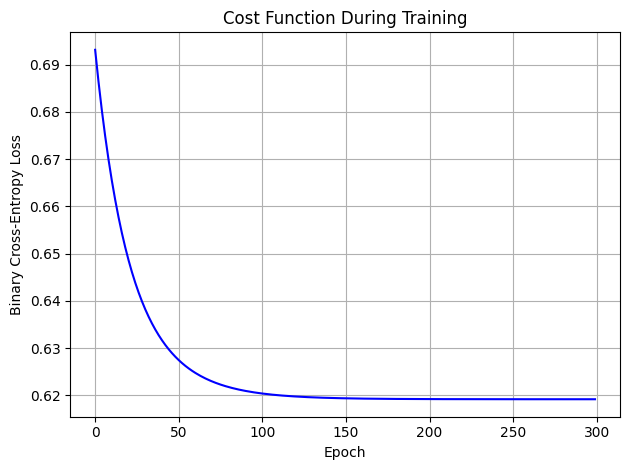

In [6]:

import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history, color='blue')
plt.title("Cost Function During Training")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📈 Step 8: Visualize Fitted Sigmoid Curve

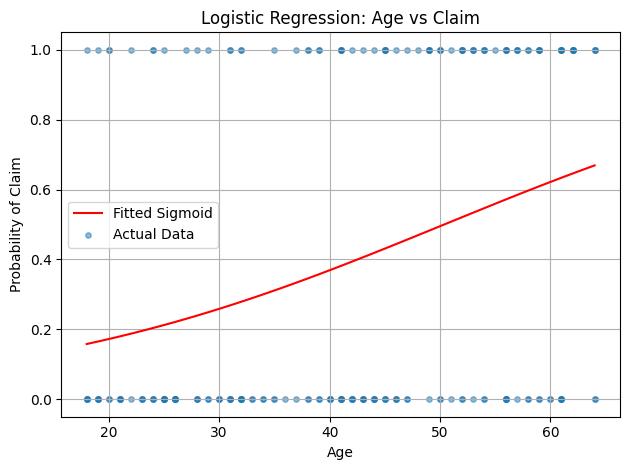

In [7]:

ages = list(range(int(X.min()), int(X.max()) + 1))
x_vals = [(x - mean_X) / std_X for x in ages]
y_probs = [sigmoid(theta_0 + theta_1 * x) for x in x_vals]

plt.plot(ages, y_probs, label="Fitted Sigmoid", color='red')
plt.scatter(X, y, alpha=0.5, label="Actual Data", s=15)
plt.xlabel("Age")
plt.ylabel("Probability of Claim")
plt.title("Logistic Regression: Age vs Claim")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## ✅ Final Summary

We trained a logistic regression model from scratch using `Age` as a single predictor, with final learned parameters:
- **Final model parameters**:
- **Intercept (θ₀)** ≈ -0.45
- **Slope (θ₁)** ≈ +0.71

- The model predicts the probability of `Claim` based on normalized `Age`:

  $$
  \hat{y} = \sigma(\theta_0 + \theta_1 \cdot x_{\text{normalized}})
  $$

- You can use this probability for classification by applying a threshold (e.g. 0.5)



## 🔍 Why Does the Sigmoid Curve Not Look Asymptotic in Age vs Probability?

A common question when visualizing logistic regression predictions over a real-world feature like **Age** is:

> _"Why doesn't the sigmoid curve appear to approach 0 and 1 like the standard sigmoid function?"_

### 🧠 Explanation:
The sigmoid function is **always asymptotic** by nature. However, when we plot `Age` vs `Predicted Probability`, what we're really plotting is:

$$
\hat{y} = \sigma(\theta_0 + \theta_1 \cdot x_{\text{normalized}})
$$

This curve may **appear non-asymptotic** due to:

1. **Limited range of Age**: The age values only span from ~18 to 65
2. **Small slope (θ₁ ≈ 0.7)**: This causes the sigmoid input `z = θ₀ + θ₁·x` to stay within a narrow band (e.g., -2 to +2)
3. **Sigmoid only looks asymptotic at large |z|**: In the range z ∈ [-2, +2], sigmoid(z) varies smoothly between ~0.1 to ~0.9

Hence, the curve appears “flat” in the middle and does not visibly approach 0 or 1.

---

## 🧪 Simulation: What Happens if θ₁ is Larger?

To illustrate this, we plotted sigmoid predictions over Age using various fixed slope values:

- **θ₁ = 0.7** (trained model)
- **θ₁ = 2, 5, 10** (manually exaggerated)

As θ₁ increases:
- The curve becomes sharper and more step-like
- Predictions quickly jump from ~0 to ~1 around a narrow band of Age

This shows that:
> The curve _can_ become visibly asymptotic — **but only when θ₁ is large enough to stretch z across the extreme ends of the sigmoid**

---

## ✅ So Which Model Is Better?

| Scenario                         | θ₁ ≈ 0.7 (soft) | θ₁ = 5 or 10 (sharp) |
|----------------------------------|------------------|-----------------------|
| Data with label overlap          | ✅ Better         | ❌ Too confident       |
| Clear class separation           | ❌ Too soft       | ✅ More precise        |
| Generalization to real-world     | ✅ Safer          | ❌ Overfit risk        |
| Training loss (log loss)         | ✅ Minimized      | ❌ Possibly worse      |

### Verdict:
For this dataset, **θ₁ ≈ 0.7 is better** because:
- The relationship between Age and Claim is not clearly separable
- A sharp curve might wrongly predict 0/1 too confidently on ambiguous data

If you want to validate this further, try comparing log-loss or AUC using a validation set.



## 🎨 Visual Comparison of Sigmoid Curves with Varying Slopes

To further illustrate how the slope parameter (θ₁) affects the shape of the sigmoid curve in our Age vs Claim prediction, here’s a plot of several sigmoid curves with increasing θ₁ values:

- θ₁ = 0.7 (actual trained value)
- θ₁ = 2, 5, 10, 20 (manually exaggerated)

Observe how the sigmoid sharpens and becomes step-like as θ₁ increases.


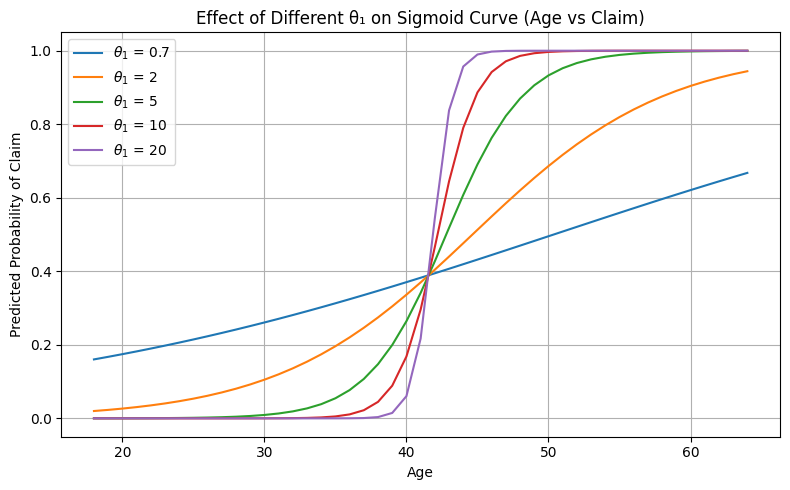

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/Insurance_Claim_Dataset.csv")
X = df['Age'].values

# Normalize Age
mean_X = X.mean()
std_X = X.std()
X_norm = (X - mean_X) / std_X

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prepare Age range and normalized x
ages = list(range(int(X.min()), int(X.max()) + 1))
x_norm_vals = [(age - mean_X) / std_X for age in ages]

# Try different θ₁ values
theta_0 = -0.45
theta_1_values = [0.7, 2, 5, 10, 20]

plt.figure(figsize=(8, 5))
for theta_1 in theta_1_values:
    probs = [sigmoid(theta_0 + theta_1 * x) for x in x_norm_vals]
    plt.plot(ages, probs, label=f"$\\theta_1$ = {theta_1}")

plt.title("Effect of Different θ₁ on Sigmoid Curve (Age vs Claim)")
plt.xlabel("Age")
plt.ylabel("Predicted Probability of Claim")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## ✅ Final Conclusion

From our manual logistic regression experiment, here are the key takeaways:

### 🔹 Model Results
We trained a logistic regression model from scratch using `Age` as a single predictor, with final learned parameters:
- **Intercept (θ₀)** ≈ -0.45
- **Slope (θ₁)** ≈ +0.71

The probability of a claim is predicted using:

$$
\hat{y} = \sigma(\theta_0 + \theta_1 \cdot x_{\text{normalized}})
$$

---

### 🔹 Curve Behavior
The sigmoid curve is not extremely sharp — this is because the slope (θ₁) is relatively small, indicating that `Age` alone is not a very strong predictor of `Claim`.

We also saw:
- **Smaller θ₁ → smoother (less confident) transition**
- **Larger θ₁ → sharper (more confident) transition**

---

### 🔹 What This Tells Us
- Logistic regression gives probabilistic predictions based on the input.
- The slope determines how confident the model is in class separation.
- A feature with overlapping values across classes (like Age) leads to a soft decision boundary.

---

### 🧪 Next Steps
- Try other features like `Smoker`, `BMI`, or a combination of them.
- Extend to multivariate logistic regression.
- Apply threshold tuning or regularization for performance and generalization.

You've now built, trained, and understood logistic regression — 100% manually. 💪
